## Prime numbers generator

In [14]:
def infinite_numbers(lower_bound):
    n = lower_bound
    while True:
        yield n
        n += 1

def is_prime(number):
    numbers_before = range(2, number)
    have_divisors = sum([number % n == 0 for n in numbers_before]) > 0
    return not have_divisors

def primes():
    for number in infinite_numbers(2):
        if is_prime(number):
            yield number
            
def take(generator, n):
    output = []
    count = 1
    for prime in generator:
        output.append(prime)
        count += 1
        if count > n:
            break
    return output


## Euclid numbers generator

In [22]:
import numpy as np

def euclid_numbers():
    for i in infinite_numbers(1):
        ps = np.prod(take(primes(), i))
        yield ps + 1
        

In [31]:
[ne for ne in take(euclid_numbers(), 6)]

[3, 7, 31, 211, 2311, 30031]

In [32]:
take(primes(), 6)

[2, 3, 5, 7, 11, 13]

In [35]:
is_prime(59)

True

In [36]:
509 * 59

30031

In [39]:
sum(range(1, 9+1))

45

In [45]:
def minkowski_sum(A, B):
    return list(set([a + b for a in A for b in B]))

$ |A+B| = |A| \cdot |B| $

In [56]:
A = [0,1,2]
B = [0]
r = minkowski_sum(A, B)
print(r)
print(len(r), len(A) * len(B))

[0, 1, 2]
3 3


In [67]:
A = np.array([0, 1])
B = A
R = minkowski_sum(A, B)
print(R)
print(len(R), len(A) * len(B))

[0, 1, 2]
3 4


Найти такие A и B, при которых $ A + (B - A) = B $ (сумма и разность по Минковскому)

In [78]:
A = np.array([1])
B = np.array([1,2,3,4]) # B может быть любым множеством с любым количеством элементов

D = minkowski_sum(B, -A)
R = minkowski_sum(A, D)

print(R, B)
print(R == B)

[1, 2, 3, 4] [1 2 3 4]
[ True  True  True  True]


### Example where $ (P - P) \not\subset P $

<IPython.core.display.Javascript object>


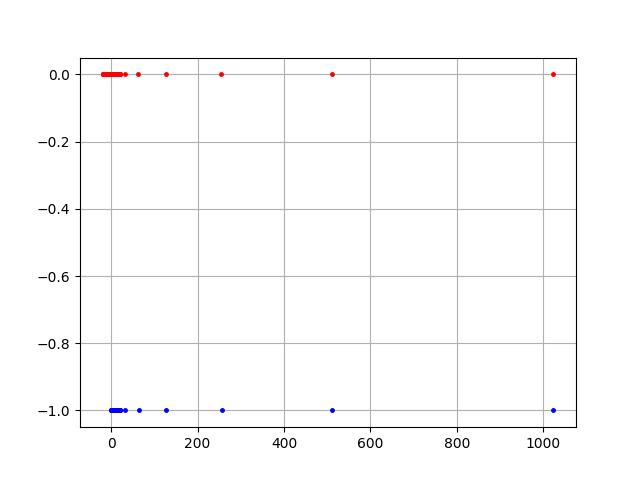

In [118]:
import matplotlib.pyplot as plt
%matplotlib notebook

P = np.array([2**n for n in range(11)])
ps = P - P[0] # minkowski_sum(P, -P)

y = 0

xmin = min(P)
xmax = max(P)

for p in P:
    plt.plot(p, y-1, 'bo', ms=2.5)

for p in ps:
    plt.plot(p, y, 'ro', ms=2.5, mfc='r')

plt.grid()    
plt.show()

### Example where $ (P - P) \subset P $

В этом случае $ P = dZ $ и ясно видно даже без этого, что $ P $ должен быть бесконечным множеством. Потому что иначе, если мы посмотрим на последний элемент $ P $, то увидим, что при отнимании у него любого числа, он выйдет из множетсва $ P $.

<IPython.core.display.Javascript object>


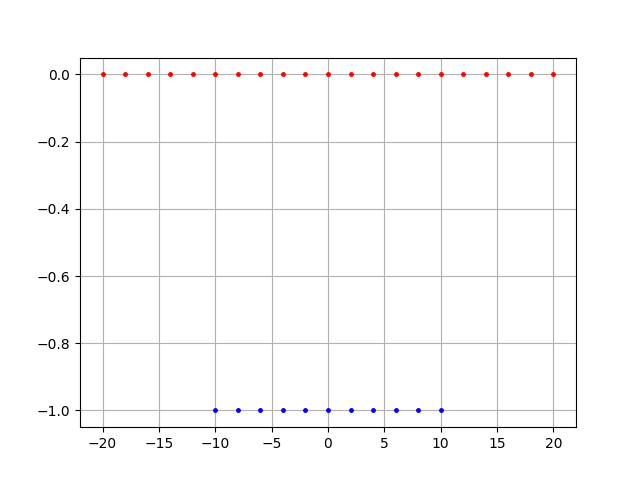

In [128]:
r = 5
P = np.array([2*n for n in range(-r, r+1)])
ps = minkowski_sum(P, -P)

y = 0

xmin = min(P)
xmax = max(P)

fig = plt.figure()
for p in P:
    plt.plot(p, y-1, 'bo', ms=2.5)

for p in ps:
    plt.plot(p, y, 'ro', ms=2.5, mfc='r')

plt.grid()    
plt.show()

In [203]:
from collections import defaultdict

def takeWhile(generator, condition):
    output = []
    for item in generator:
        if condition(item):
            output.append(item)
        else:
            break
    return output

def factorize(n):
    factors = []
    primes_up_to_n = takeWhile(primes(), lambda p: p <= n)
    number = n
    while number != 1:
        for prime in reversed(primes_up_to_n):
            if number % prime == 0:
                factors.append(prime)
                number /= prime
            if number == 1:
                break
    return factors

def count(xs):
    counter = defaultdict(int)
    for x in xs:
        counter[x] += 1
    return counter

# returns {p1^x, p2^y, p3^z, ...}
def exponent_factorize(n):
    return [(prime, power) for prime, power in count(factorize(n)).items()]

def minkwoski_prod(A, B):
    return [a * b for a in A for b in B]

def all_factors(n):
    prime_factors = exponent_factorize(n)
    expanded_factors = []
    for prime_factor in prime_factors:
        (prime, power) = prime_factor
        expanded_factor = [prime**pwr for pwr in range(power + 1)]
        expanded_factors.append(expanded_factor)
    output = [1]
    for expanded_factor in expanded_factors:
        output = minkwoski_prod(expanded_factor, output)
    output.sort()
    return output

def all_factors_count(n):
    return np.prod([(power + 1) for (_, power) in exponent_factorize(n)])

def discrete_logarithm(base, number):
    factors = exponent_factorize(number)
    for (p, e) in factors:
        if p == base:
            return e
    return 0


In [192]:
factorize(1023)

[31, 11, 3]

In [193]:
exponent_factorize(1024)

[(2, 10)]

In [195]:
all_factors(1023)

[1, 3, 11, 31, 33, 93, 341, 1023]

In [220]:
n = 1023
len(all_factors(n)) == all_factors_count(n)

True

In [223]:
import math

def number_of_groups(things, minumin, maximum):
    return sum([math.comb(things, places) for places in range(minumin, maximum+1)])

def powerset(S):
    return S


In [225]:
number_of_groups(5, 1, 4)

30